In [1]:
import pandas as pd
import datetime

In [2]:
configuration = 'Mammoth_dates_3mheight.xlsx'

config_data = pd.read_excel(configuration, header=0, parse_dates=True)
starts = config_data['Start']
stops = config_data['Stop']
file_names = config_data['File Name']

zms = config_data['zm'] if 'zm' in config_data.columns else [None for i in range(starts.size)]
z0s = config_data['z0'] if 'z0' in config_data.columns else [None for i in range(starts.size)]
hs = config_data['h'] if 'h' in config_data.columns else [None for i in range(starts.size)]


In [3]:
filename = 'Mammoth_EC_data.xlsx'

filter_params = {'qc_co2_flux__=': 0,
                 'u*__>=': 0.3,
                 'co2_flux__>': 0,
                 'co2_flux__<=': 50000}

In [4]:
from copy import copy

data = pd.read_excel(filename, header=0, skiprows=[1])
column_names = list(copy(data.columns))
data.index = data[data.columns[0]]
column_names = column_names[1:]
data = data[column_names]

In [5]:
from eddy.footprint import save_filtered_footprint as save_fp

plot_range = [None, None, None, None]

for (filename, start, stop, zm, z0, h) in zip(file_names.values, starts, stops, zms, z0s, hs):
    filter_params['start'] = start
    filter_params['stop'] = stop
    footprint_settings = {}
    if zm is not None:
        footprint_settings['zm'] = float(zm)
    if z0 is not None:
        footprint_settings['z0'] = float(z0)
    if h is not None:
        footprint_settings['h'] = float(h)
    
    a = save_fp(data, filter_parameters = filter_params, footprint_settings = footprint_settings, directory='./', filename = filename)
    plot_range[0] = a[0] if plot_range[0] is None or plot_range[0] > a[0] else plot_range[0]
    plot_range[1] = a[1] if plot_range[1] is None or plot_range[1] < a[1] else plot_range[1]
    plot_range[2] = a[2] if plot_range[2] is None or plot_range[2] > a[2] else plot_range[2]
    plot_range[3] = a[3] if plot_range[3] is None or plot_range[3] < a[3] else plot_range[3]

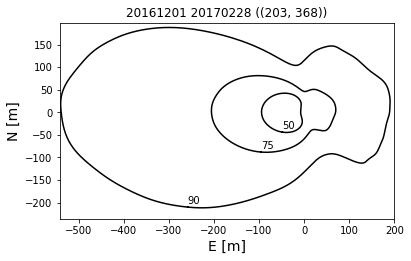

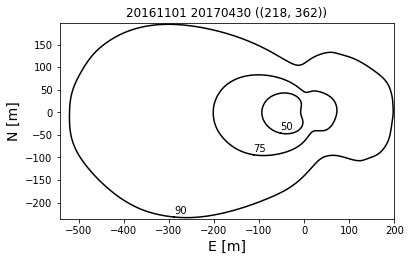

In [6]:
from eddy.footprint import plot_footprint_from_file as plot_fp
import matplotlib.pylab as plt

for (filename, start, stop) in zip(file_names.values, starts, stops):
    
    plot_fp(filename, start, stop, show_pdf = False, save_fig = False, directory = './')
    plt.axis(plot_range)
    plt.savefig(filename + '.eps', dpi = 150)